# Parte 1

In [1]:
pip list

Package                  Version
------------------------ -----------
astroid                  2.11.3
autopep8                 1.6.0
backcall                 0.2.0
beautifulsoup4           4.11.1
bs4                      0.0.1
cachetools               5.2.0
certifi                  2021.10.8
charset-normalizer       2.0.12
click                    8.1.2
colorama                 0.4.4
cycler                   0.11.0
debugpy                  1.6.0
decorator                5.1.1
dill                     0.3.4
emoji                    1.7.0
entrypoints              0.4
filelock                 3.6.0
fonttools                4.33.3
google-api-core          2.8.1
google-api-python-client 2.49.0
google-auth              2.6.6
google-auth-httplib2     0.1.0
googleapis-common-protos 1.56.2
httplib2                 0.20.4
huggingface-hub          0.5.1
idna                     3.3
importlib-metadata       4.11.3
ipykernel                6.13.0
ipython                  7.32.0
isort               

In [2]:
pip install --upgrade xlrd  # versao 2.0.1 em ambos

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_excel("Concrete_Data.xls", header=0)
df.head()


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
columns = {'Cement', 'BlastFurnaceSlag', 'FlyAsh', 'Water', 'Superplasticizer','CoarseAggregate', 'FineAggregate', 'Age', 'CompressiveStrength'}
df.columns = columns

In [6]:
df.describe()

,Water,FineAggregate,CompressiveStrength,BlastFurnaceSlag,Cement,CoarseAggregate,Superplasticizer,Age,FlyAsh
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


A baseline score can help you decide whether your new features are worth keeping, or whether you should discard them and possibly try something else.

In [7]:
X = df.copy()
y = X.pop("CompressiveStrength")


In [8]:
# Train and score baseline model
#baseline = RandomForestRegressor(criterion="mae", random_state=0)
baseline = RandomForestRegressor(criterion="absolute_error", random_state=0)

baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="neg_mean_absolute_error"
)
baseline_score = -1 * baseline_score.mean()

print(f"MAE Baseline Score: {baseline_score:.4}")


MAE Baseline Score: 32.8


In [9]:
X = df.copy()
y = X.pop("CompressiveStrength")

# Create synthetic features
X["FCRatio"] = X["FineAggregate"] / X["CoarseAggregate"]
X["AggCmtRatio"] = (X["CoarseAggregate"] + X["FineAggregate"]) / X["Cement"]
X["WtrCmtRatio"] = X["Water"] / X["Cement"]

# Train and score model on dataset with additional ratio features
model = RandomForestRegressor(criterion="absolute_error", random_state=0)
score = cross_val_score(
    model, X, y, cv=5, scoring="neg_mean_absolute_error"
)
score = -1 * score.mean()

print(f"MAE Score with Ratio Features: {score:.4}")


MAE Score with Ratio Features: nan


c:\Python378\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python378\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python378\lib\site-packages\sklearn\ensemble\_forest.py", line 328, in fit
    X, y, multi_output=True, accept_sparse="csc", dtype=DTYPE
  File "c:\Python378\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Python378\lib\site-packages\sklearn\utils\validati

Mutual Information and What it Measures¶
Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other. If you knew the value of a feature, how much more confident would you be about the target?

A entropia é normalmente usada na teoria da informação para medir a pureza ou impureza de um determinado conjunto.
A pergunta que ela responde é: O quanto diferente/iguais esses elementos são entre si?

# Parte 2

1985 carros

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [11]:
plt.style.use("seaborn-whitegrid")

#df = pd.read_csv("../input/fe-course-data/autos.csv")
df = pd.read_csv("Automobile_data.csv")

df.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [12]:
for col in df.columns:
    quant = np.sum(df[col]=='?')
    print(f'{col}: {quant}')


symboling: 0
normalized-losses: 41
make: 0
fuel-type: 0
aspiration: 0
num-of-doors: 2
body-style: 0
drive-wheels: 0
engine-location: 0
wheel-base: 0
length: 0
width: 0
height: 0
curb-weight: 0
engine-type: 0
num-of-cylinders: 0
engine-size: 0
fuel-system: 0
bore: 4
stroke: 4
compression-ratio: 0
horsepower: 2
peak-rpm: 2
city-mpg: 0
highway-mpg: 0
price: 4


In [13]:
print(df.shape)
flag = (df['num-of-doors'] == '?') | (df['bore'] == '?') | (df['stroke'] == '?') | (df['horsepower'] == '?') | (df['peak-rpm'] == '?')   | (df['price'] == '?') 
print(f'Apagando {np.sum(flag)}')
df = df[~flag]
print(df.shape)


(205, 26)
Apagando 12
(193, 26)


In [14]:

df.drop('normalized-losses', axis=1, inplace=True)


In [15]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

The scikit-learn algorithm for MI treats discrete features differently from continuous features. Consequently, you need to tell it which are which. As a rule of thumb, anything that must have a float dtype is not discrete. Categoricals (object or categorial dtype) can be treated as discrete by giving them a label encoding. (You can review label encodings in our Categorical Variables lesson.)

In [16]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [17]:
df[['peak-rpm', 'horsepower', 'stroke', 'bore', 'fuel-system',
    'num-of-cylinders', 'engine-type', 'drive-wheels', 'engine-location']][0:5]


,peak-rpm,horsepower,stroke,bore,fuel-system,num-of-cylinders,engine-type,drive-wheels,engine-location
0,5000,111,2.68,3.47,mpfi,four,dohc,rwd,front
1,5000,111,2.68,3.47,mpfi,four,dohc,rwd,front
2,5000,154,3.47,2.68,mpfi,six,ohcv,rwd,front
3,5500,102,3.4,3.19,mpfi,four,ohc,fwd,front
4,5500,115,3.4,3.19,mpfi,five,ohc,4wd,front


In [18]:
#bore stroke
df['bore'] = df['bore'].astype(float)
df['stroke'] = df['stroke'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['peak-rpm'] = df['peak-rpm'].astype(float)
df['price'] = df['price'].astype(float)



In [19]:
df.dtypes


symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [20]:
df.head()


,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [21]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    #print(colname)
    X[colname], _ = X[colname].factorize()
#print(X[colname])
# All discrete features should now have integer dtypes (double-check this before using MI!)
#discrete_features = ~(X.dtypes == "float64")
#discrete_features


In [25]:
discrete_features = ~(X.dtypes == "float64")
discrete_features


symboling             True
make                  True
fuel-type             True
aspiration            True
num-of-doors          True
body-style            True
drive-wheels          True
engine-location       True
wheel-base           False
length               False
width                False
height               False
curb-weight           True
engine-type           True
num-of-cylinders      True
engine-size           True
fuel-system           True
bore                 False
stroke               False
compression-ratio    False
horsepower           False
peak-rpm             False
city-mpg              True
highway-mpg           True
dtype: bool

In [22]:
X.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,0,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,0,0,0,0,0,0,0,88.6,168.8,...,0,130,0,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,0,0,0,0,1,0,0,94.5,171.2,...,1,152,0,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,1,0,0,1,2,1,0,99.8,176.6,...,0,109,0,3.19,3.40,10.0,102.0,5500.0,24,30
4,2,1,0,0,1,2,2,0,99.4,176.6,...,2,136,0,3.19,3.40,8.0,115.0,5500.0,18,22


In [24]:
X.dtypes

symboling              int64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
dtype: object

Scikit-learn has two mutual information metrics in its feature_selection module: 
one for real-valued targets (mutual_info_regression) and 
one for categorical targets (mutual_info_classif).

Our target, price, is real-valued. The next cell computes the MI scores for our features and wraps them up in a nice dataframe.

In [26]:
from sklearn.feature_selection import mutual_info_regression

In [27]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(
        X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [29]:
mi_scores = make_mi_scores(X, y, discrete_features)


In [30]:
mi_scores[::]  # show a few features with their MI scores


curb-weight          1.556474
engine-size          0.996468
highway-mpg          0.952258
horsepower           0.882702
city-mpg             0.854420
width                0.671153
length               0.599065
wheel-base           0.585861
make                 0.542139
bore                 0.487618
fuel-system          0.478664
stroke               0.379420
height               0.349836
num-of-cylinders     0.332501
drive-wheels         0.332448
symboling            0.229462
peak-rpm             0.209466
compression-ratio    0.156343
engine-type          0.150298
aspiration           0.087755
body-style           0.081287
fuel-type            0.047279
engine-location      0.035329
num-of-doors         0.012705
Name: MI Scores, dtype: float64

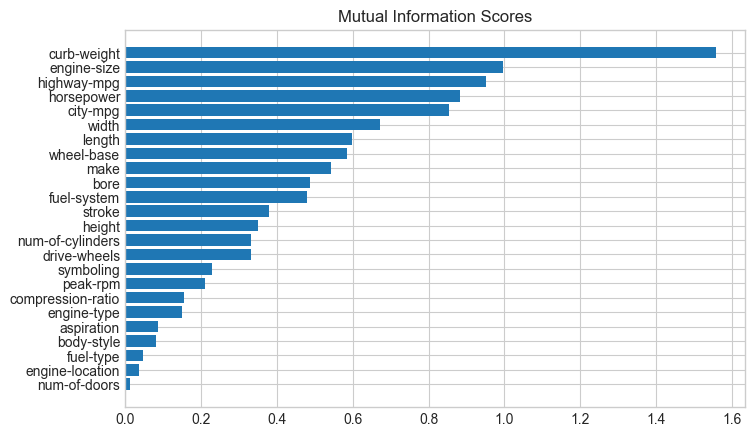

In [31]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)


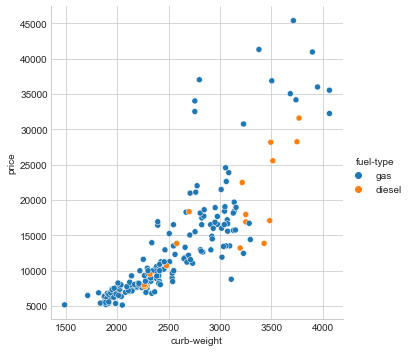

In [38]:
sns.relplot(x="curb-weight", y="price", hue="fuel-type", data=df)


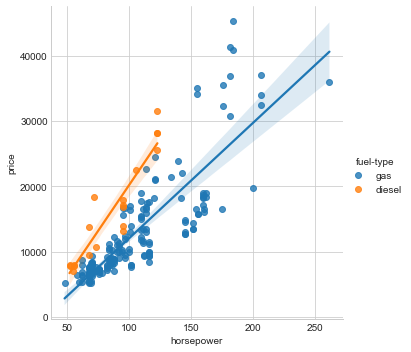

In [33]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df)
